In [1]:
import emoji
import re
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 18000
# embedding_dim = 64
max_length = 120
# filters = 100
# kernel_size = 3
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [3]:
emoji_list = emoji.UNICODE_EMOJI.keys()

In [4]:
data = pd.read_csv("data/Twitter_Data.csv")
labels = list(data['Annotation'])
texts = list(data['Tweets'])
print(len(texts))
print(len(labels))

16907
16907


In [5]:
import preprocessing
for i in range(0, len(texts)):
    texts[i] = preprocessing.preprocess(texts[i])

In [6]:
test_case = '@narendra_modi thanks @trump for his support in #vaccine. read at  http://pandas.pydata.org/pandas-docs/s 😳😳'
print(preprocessing.preprocess(test_case))
print(texts[26])

<user> thanks <user> for his support in <hashtag> vaccine read at <url> <flushedface> <flushedface> 
rt <allcaps> <user> <hashtag> muslim <hashtag> islam welcome to the hotel islamfornia may check out any time but never leave <url> http  …


In [8]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [18]:
oops = ''
for words in texts:
    words = str(words)
    oops += " " + words
# print(oops)


In [38]:
stopwords = set(STOPWORDS)
stopwords.add("allcaps")
stopwords.add("hashtag")
stopwords.add("user")
stopwords.add("elong")
stopwords.add("url")
stopwords.add("repeat")
stopwords.add("dont")
stopwords.add("im")

stopwords.add("<allcaps>")
stopwords.add("<hashtag>")
stopwords.add("<user>")
stopwords.add("<elong>")
stopwords.add("<url>")
stopwords.add("<repeat>")
stopwords.add("rt")
stopwords.add("RT")
print(stopwords)

{'any', 'k', 'of', 'had', 'am', 'she', 'into', 'only', 'why', 'him', 'in', 'cannot', 'com', 'because', 'below', 'since', 'this', "when's", 'against', 'too', 'who', 'ourselves', 'also', 'do', 'RT', 'been', 'www', 'dont', 'or', 'after', "that's", "i'll", 'most', 'over', "why's", 'but', 'himself', 'to', 'down', '<repeat>', 'before', "you'll", 'each', 'all', 'no', 'some', 'out', 'again', 'nor', 'therefore', 'herself', 'by', "mustn't", 'same', "isn't", '<hashtag>', 'whom', "you've", 'our', "shouldn't", "haven't", 'my', 'he', 'her', 'were', 'further', 'just', "aren't", 'url', 'its', 'otherwise', 'being', "she'd", "he'd", "he's", 'i', 'that', "hasn't", 'on', "there's", 'under', 'until', 'an', '<allcaps>', "didn't", 'doing', "let's", "you're", 'yours', 'hence', "she'll", 'theirs', "we're", 'has', "shan't", 'other', 'was', 'r', 'and', 'shall', "weren't", 'above', 'could', 'itself', 'if', 'their', 'it', 'yourselves', 'so', 'be', 'hers', 'your', 'up', 'hashtag', 'does', 'like', 'we', "don't", "we

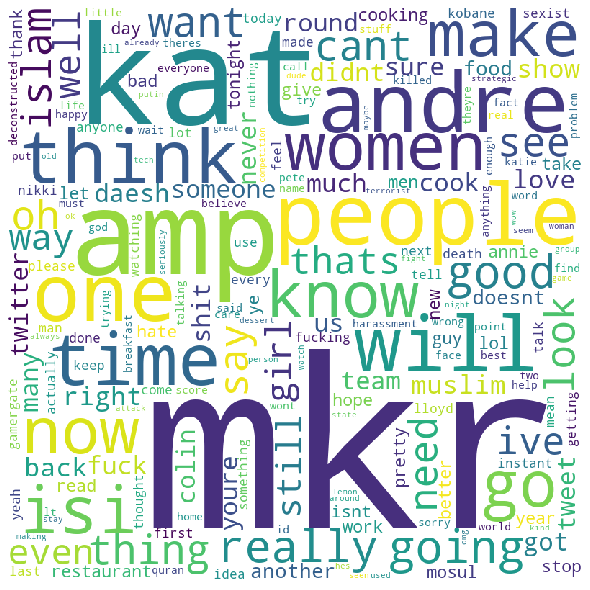

In [39]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                collocations=False,
                min_font_size = 10).generate(oops) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [40]:
import collections
filtered_words = [word for word in oops.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
print(words)
print(counts)

['mkr', 'kat', 'amp', 'people', 'andre', 'one', 'will', 'think', 'isis', 'women']
[4247, 686, 512, 480, 453, 397, 390, 326, 321, 317]


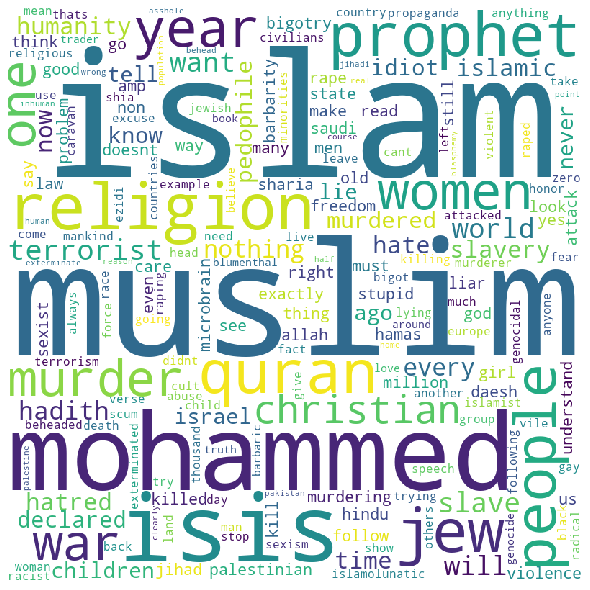

In [41]:
with open('data/racism.json', 'r') as file:
    data_racism = pd.read_json(file,lines=True)
texts = list(data_racism['text'])
for i in range(0, len(texts)):
    texts[i] = preprocessing.preprocess(texts[i])
oops = ''
for words in texts:
    words = str(words)
    oops += " " + words
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                collocations=False,
                min_font_size = 10).generate(oops) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [42]:
import collections
filtered_words = [word for word in oops.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
print(words)
print(counts)

['islam', 'muslims', 'muslim', 'mohammed', 'isis', 'religion', 'jews', 'prophet', 'quran', 'people']
[637, 362, 238, 187, 155, 145, 133, 131, 129, 122]


In [ ]:
with open('data/neither.json', 'r') as file:
    data_neither = pd.read_json(file,lines=True)
texts = list(data_neither['text'])
for i in range(0, len(texts)):
    texts[i] = preprocessing.preprocess(texts[i])
oops = ''
for words in texts:
    words = str(words)
    oops += " " + words
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                collocations=False,
                min_font_size = 10).generate(oops) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [ ]:
import collections
filtered_words = [word for word in oops.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
print(words)
print(counts)

In [ ]:
with open('data/sexism.json', 'r') as file:
    data_sexism = pd.read_json(file,lines=True)
texts = list(data_sexism['text'])
for i in range(0, len(texts)):
    texts[i] = preprocessing.preprocess(texts[i])
oops = ''
for words in texts:
    words = str(words)
    oops += " " + words
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                collocations=False,
                min_font_size = 10).generate(oops) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [ ]:
import collections
filtered_words = [word for word in oops.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
print(words)
print(counts)